Using matplotlib backend: <object object at 0x000001C85E177720>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


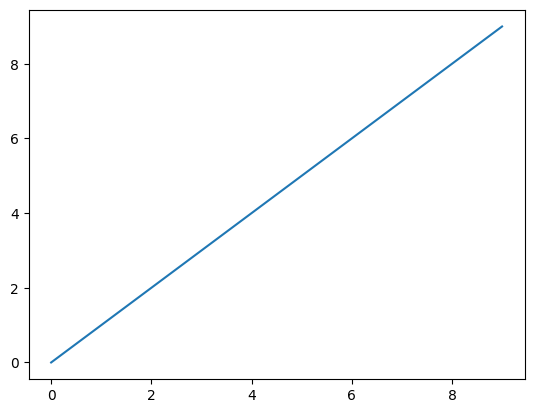

In [1]:
%pylab 
%matplotlib inline 
import pandas 

plot(arange(10))
#셀단위로 실행(shift + enter)

In [2]:
#판다스 선언
from pandas import Series, DataFrame
import pandas as pd 

#셀단위 실행:shift + enter

type

In [7]:
multicampus = Series([100,200,300,400,500], 
    index=["22-9-30","22-10-1","22-10-2","22-10-3","22-10-4"])

print( type(multicampus) )
print( multicampus )
print( multicampus["22-10-1"] )

<class 'pandas.core.series.Series'>
22-9-30    100
22-10-1    200
22-10-2    300
22-10-3    400
22-10-4    500
dtype: int64
200


In [8]:
#데이터프레임(2차원 행열데이터)
data = {"foreigner":[1,2,3,4,5,6],
        "sratio":[10,20,30,40,50,60],
        "org":[100,200,300,400,500,600],
        "sprice":[1,2,3,4,5,6],
        "private":[10,20,30,40,50,60]
}

print(data)


{'foreigner': [1, 2, 3, 4, 5, 6], 'sratio': [10, 20, 30, 40, 50, 60], 'org': [100, 200, 300, 400, 500, 600], 'sprice': [1, 2, 3, 4, 5, 6], 'private': [10, 20, 30, 40, 50, 60]}


In [9]:
frame = DataFrame(data)
print( type(frame) )
print( frame )


<class 'pandas.core.frame.DataFrame'>
   foreigner  sratio  org  sprice  private
0          1      10  100       1       10
1          2      20  200       2       20
2          3      30  300       3       30
3          4      40  400       4       40
4          5      50  500       5       50
5          6      60  600       6       60


In [17]:
#SQL select 컬럼명... 
#색인도 변경(시계열)
frame2 = DataFrame(data, 
    columns=["foreigner","private","org","sratio","sprice"],
    index=["22-10-1","22-10-2","22-10-3","22-10-4","22-10-5","22-10-6"])

#print(frame2)
#print( frame2["org"] )
#특정 행을 슬라이싱 .loc속성(location)
print( frame2.loc["22-10-2"] )

foreigner      2
private       20
org          200
sratio        20
sprice         2
Name: 22-10-2, dtype: int64


In [18]:
#csv파일 로딩
!type c:\work\ex1.csv 

id, name, price, description
1, iphone, 890000, iphone 6s 7 8 x 
2, android, 990000, samsung phone
3, winphone, 450000, microsoft winphone 


In [19]:
#데이터프레임으로 복구(로딩)
df = pd.read_csv("c:\\work\\ex1.csv")
print( df )

   id       name   price           description
0   1     iphone  890000      iphone 6s 7 8 x 
1   2    android  990000         samsung phone
2   3   winphone  450000   microsoft winphone 


In [20]:
#csv파일 로딩
!type c:\work\ex2.csv 

1, iphone, 890000, iphone 6s 7 8 x 
2, android, 990000, samsung phone
3, winphone, 450000, microsoft winphone 


In [23]:
import pandas as pd 
#컬럼명이 없는 경우 코드로 보정
df2 = pd.read_csv("c:\\work\\ex2.csv", 
    names=["id","name","price","desc"])

print( df2 )

   id       name   price                  desc
0   1     iphone  890000      iphone 6s 7 8 x 
1   2    android  990000         samsung phone
2   3   winphone  450000   microsoft winphone 


In [24]:
#빈칸이 구분자인 경우
!type c:\work\ex3.txt 

data1 data2 data3 
1.2     2.3     1.3
0.1     1.5     2.5
3.1     3.2     3.3


In [25]:
df3 = pd.read_table("c:\\work\\ex3.txt", sep="\s+")
print( df3 )

   data1  data2  data3
0    1.2    2.3    1.3
1    0.1    1.5    2.5
2    3.1    3.2    3.3


(array([1., 1., 2., 3., 1., 1., 1.]),
 array([26.        , 28.57142857, 31.14285714, 33.71428571, 36.28571429,
        38.85714286, 41.42857143, 44.        ]),
 <BarContainer object of 7 artists>)

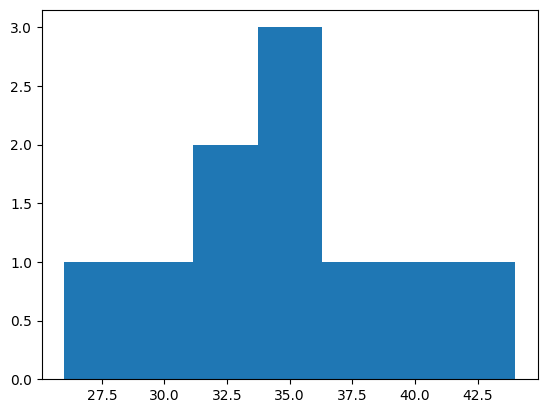

In [27]:
#import matplotlib.pyplot as plt 
#엑셀을 데이터프레임으로 로딩
dfExcel = pd.read_excel("c:\\work\\demo.xlsx", "Sheet1")
#print( dfExcel )
#그림판 생성
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(dfExcel["나이"], bins=7)


In [29]:
#조각 조각의 데이터를 합치는 작업(merge함수)
df1 = DataFrame( {"key":["b","b","a","c","a","a","b"],
                 "data1":range(7)} )
df2 = DataFrame( {"key":["a","b","d"],
                  "data2":range(3)} )
print( df1 )
print( df2 )

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2


In [30]:
#특정 키를 비교해서 병합(수평확장)
pd.merge(df1, df2, on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [31]:
#수직확장 
s1 = Series([1,2])
s2 = Series([3,4,5])
pd.concat([s1,s2])


0    1
1    2
0    3
1    4
2    5
dtype: int64

Text(0.5, 1.0, '한글로 곡선 출력')

C:\Users\student\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\student\AppData\Roaming\Python

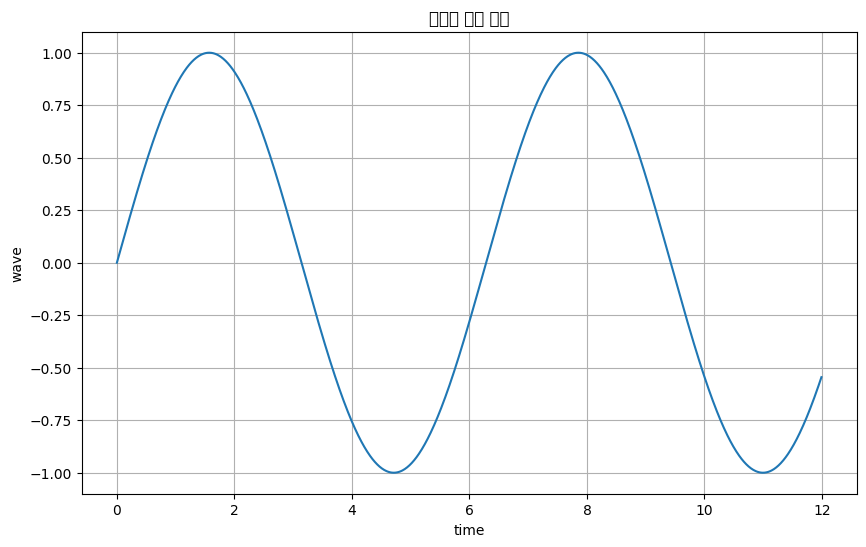

In [39]:
#차트 출력
#%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 

t = np.arange(0, 12, 0.01)
y = np.sin(t)

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()
plt.xlabel("time")
plt.ylabel("wave")
plt.title("한글로 곡선 출력")

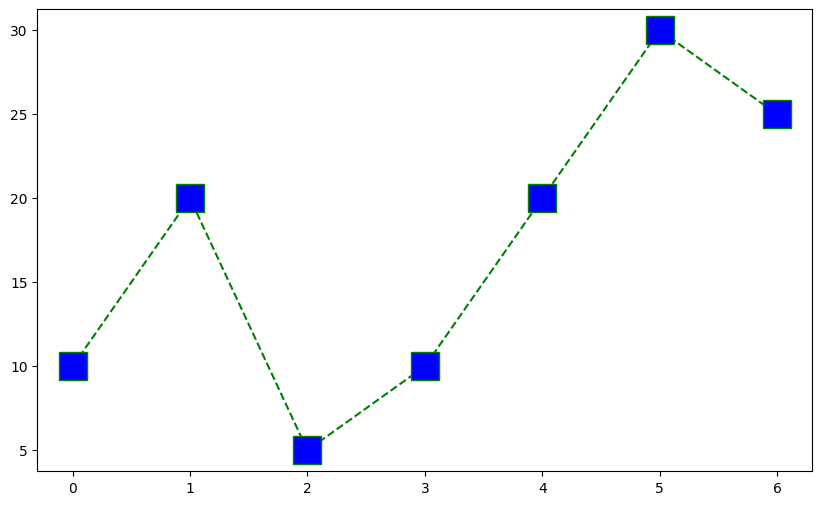

In [38]:
#라인 그래프
plt.figure(figsize=(10,6))
t = [0,1,2,3,4,5,6]
y = [10,20,5,10,20,30,25]
#상수값(o, s, >)
plt.plot(t, y, color="green", linestyle="dashed",
    marker="s", markerfacecolor="blue", markersize=20)
    